## Project Objective
To allocate a $1M+/month marketing budget efficiently by using machine learning and business rules to select target audiences, optimizing Customer Acquisition Cost (CAC), and providing explainable, actionable recommendations to stakeholders.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt


In [3]:
file_path = r"C:\Users\omnia\Desktop\Symple Lending\CAC Project\digital_marketing_campaign_dataset.csv"
mrktng_data = pd.read_csv(file_path)

In [4]:
mrktng_data.head(20)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
5,8005,25,Female,42925,Social Media,Awareness,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,IsConfid,ToolConfid,1
6,8006,38,Female,25615,Referral,Awareness,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,3,6,930,IsConfid,ToolConfid,1
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,IsConfid,ToolConfid,1
8,8008,36,Female,140788,Email,Retention,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,8,5,460,IsConfid,ToolConfid,1
9,8009,40,Male,130764,Social Media,Awareness,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,4,8,3789,IsConfid,ToolConfid,1


In [5]:
mrktng_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [6]:
# Check unique values in AdvertisingPlatform and AdvertisingTool columns
print("Unique values in AdvertisingPlatform:", mrktng_data['AdvertisingPlatform'].unique())
print("Unique values in AdvertisingTool:", mrktng_data['AdvertisingTool'].unique())

Unique values in AdvertisingPlatform: ['IsConfid']
Unique values in AdvertisingTool: ['ToolConfid']


In [7]:
# Drop columns 
columns_to_drop = ['AdvertisingPlatform', 'AdvertisingTool']
mrktng_data = mrktng_data.drop(columns= columns_to_drop)
mrktng_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         8000 non-null   int64  
 1   Age                8000 non-null   int64  
 2   Gender             8000 non-null   object 
 3   Income             8000 non-null   int64  
 4   CampaignChannel    8000 non-null   object 
 5   CampaignType       8000 non-null   object 
 6   AdSpend            8000 non-null   float64
 7   ClickThroughRate   8000 non-null   float64
 8   ConversionRate     8000 non-null   float64
 9   WebsiteVisits      8000 non-null   int64  
 10  PagesPerVisit      8000 non-null   float64
 11  TimeOnSite         8000 non-null   float64
 12  SocialShares       8000 non-null   int64  
 13  EmailOpens         8000 non-null   int64  
 14  EmailClicks        8000 non-null   int64  
 15  PreviousPurchases  8000 non-null   int64  
 16  LoyaltyPoints      8000 

In [8]:
# Check missing data
mrktng_data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Income               0
CampaignChannel      0
CampaignType         0
AdSpend              0
ClickThroughRate     0
ConversionRate       0
WebsiteVisits        0
PagesPerVisit        0
TimeOnSite           0
SocialShares         0
EmailOpens           0
EmailClicks          0
PreviousPurchases    0
LoyaltyPoints        0
Conversion           0
dtype: int64

In [9]:
# Check duplicate rows 
print("Number of duplicate rows:", mrktng_data.duplicated().sum())

Number of duplicate rows: 0


In [10]:
# Unique values for key columns
for col in mrktng_data.columns:
    print(f"Column: {col} | Unique values: {mrktng_data[col].unique()[:5]}")  

Column: CustomerID | Unique values: [8000 8001 8002 8003 8004]
Column: Age | Unique values: [56 69 46 32 60]
Column: Gender | Unique values: ['Female' 'Male']
Column: Income | Unique values: [136912  41760  88456  44085  83964]
Column: CampaignChannel | Unique values: ['Social Media' 'Email' 'PPC' 'Referral' 'SEO']
Column: CampaignType | Unique values: ['Awareness' 'Retention' 'Conversion' 'Consideration']
Column: AdSpend | Unique values: [6497.87006842 3898.66860568 1546.4295958   539.52593578 1678.04357266]
Column: ClickThroughRate | Unique values: [0.04391851 0.15572507 0.27749037 0.13761125 0.25285111]
Column: ConversionRate | Unique values: [0.08803141 0.18272468 0.07642272 0.08800419 0.1099401 ]
Column: WebsiteVisits | Unique values: [ 0 42  2 47  6]
Column: PagesPerVisit | Unique values: [2.39901653 2.91713775 8.2236191  4.54093897 2.04684712]
Column: TimeOnSite | Unique values: [ 7.39680258  5.3525486  13.79490147 14.68836262 13.9933704 ]
Column: SocialShares | Unique values: [

In [11]:
# Data overview
mrktng_data.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


Conversion
1    0.8765
0    0.1235
Name: proportion, dtype: float64


<Axes: title={'center': 'Conversion Count'}, xlabel='Conversion'>

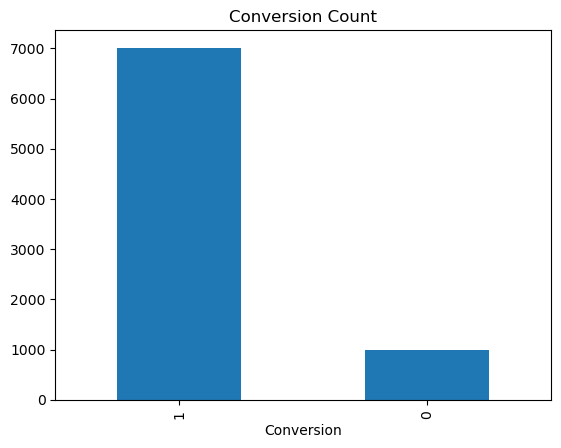

In [12]:
# Check conversion rate distribution: overall balance of target variable 
print(mrktng_data['Conversion'].value_counts(normalize=True))
mrktng_data['Conversion'].value_counts().plot(kind='bar', title='Conversion Count')

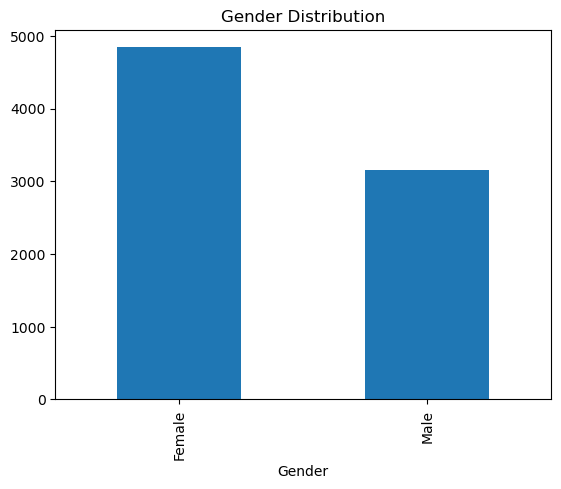

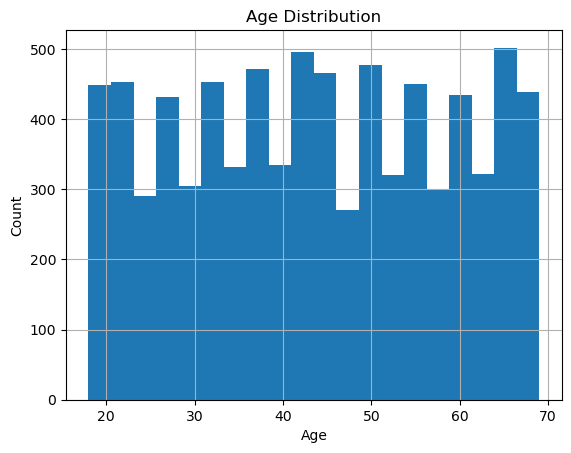

In [13]:
# Visualize gender distribution and age distribution
mrktng_data['Gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.show()

mrktng_data['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


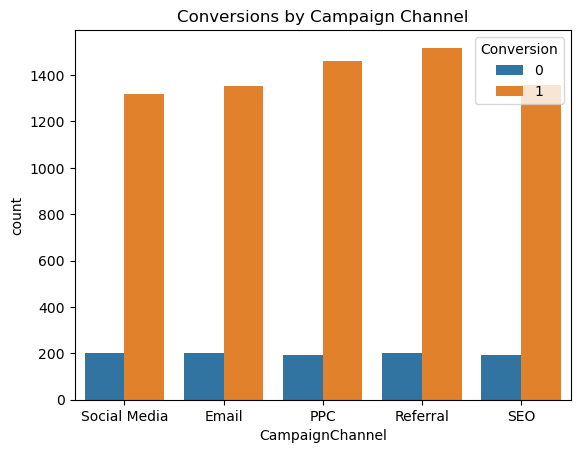

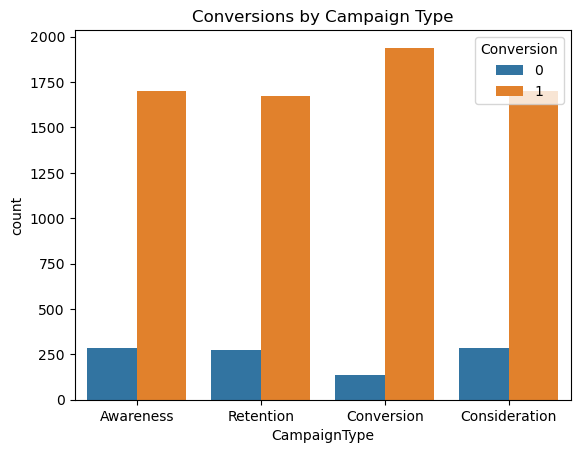

In [14]:
# Examine how campaign channel and campaign type relate to conversions

sns.countplot(x='CampaignChannel', hue='Conversion', data=mrktng_data)
plt.title('Conversions by Campaign Channel')
plt.show()

sns.countplot(x='CampaignType', hue='Conversion', data=mrktng_data)
plt.title('Conversions by Campaign Type')
plt.show()


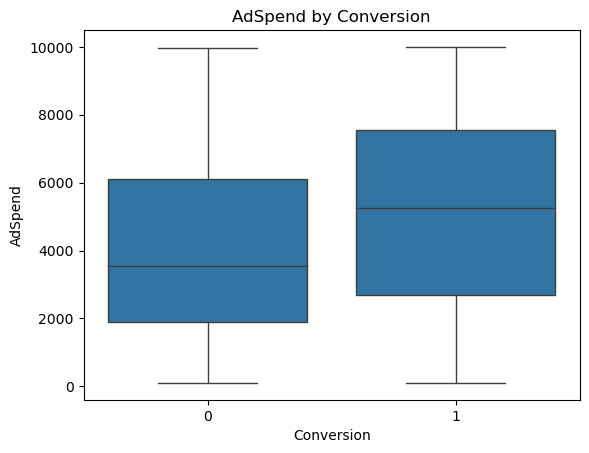

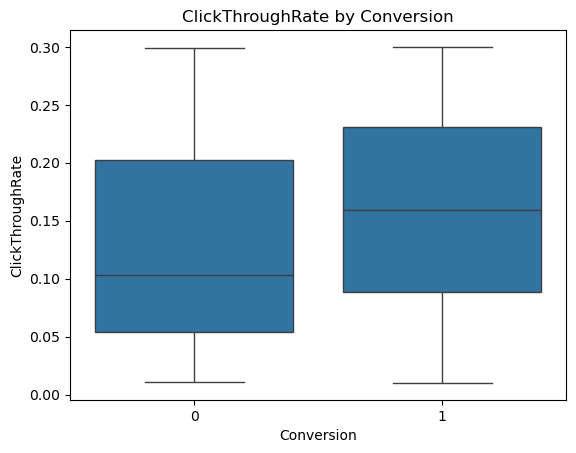

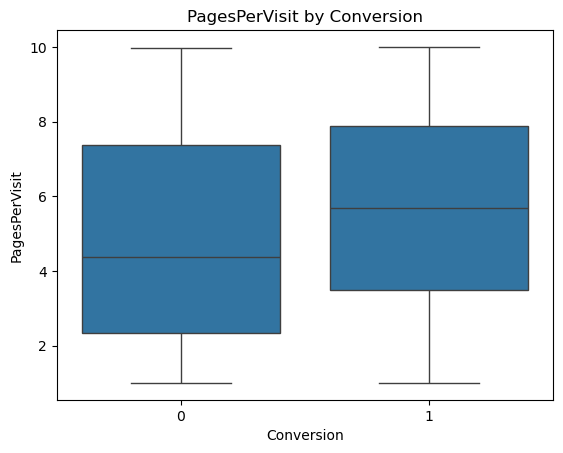

In [15]:
# Compare AdSpend, ClickThroughRate, and PagesPerVisit for converters vs. non-converters
sns.boxplot(x='Conversion', y='AdSpend', data=mrktng_data)
plt.title('AdSpend by Conversion')
plt.show()

sns.boxplot(x='Conversion', y='ClickThroughRate', data=mrktng_data)
plt.title('ClickThroughRate by Conversion')
plt.show()

sns.boxplot(x='Conversion', y='PagesPerVisit', data=mrktng_data)
plt.title('PagesPerVisit by Conversion')
plt.show()

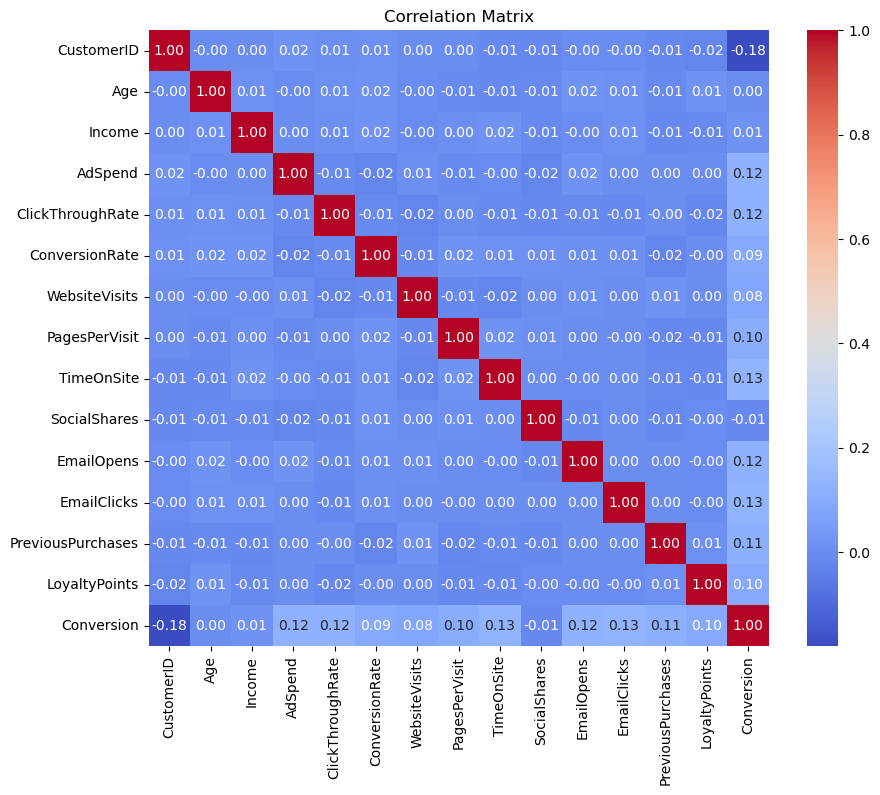

In [16]:
# Display a correlation heatmap of numerical features to help with feature selection
numeric_cols = mrktng_data.select_dtypes(include='number')

corr = numeric_cols.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
#Calculate baseline Customer Acquisition Cost (CAC) for all campaigns combined
total_spend = mrktng_data['AdSpend'].sum()
total_conversions = mrktng_data['Conversion'].sum()
baseline_cac = total_spend/total_conversions
print(f"Baseline Customer Acquisition Cost (CAC): ${baseline_cac:.2f}")

Baseline Customer Acquisition Cost (CAC): $5705.58


## Feature Engineering & Model Preparation

In [19]:
#One_hot encode categorical variables for modeling and explainability 
mrktng_data_encoded = pd.get_dummies(
    mrktng_data, 
    columns=['Gender', 'CampaignChannel', 'CampaignType'],
    drop_first=True
)

In [20]:
#Define X and y for ML
feature_cols = [col for col in mrktng_data_encoded.columns if col not in ['CustomerID', 'Conversion']]
X = mrktng_data_encoded[feature_cols]
y = mrktng_data_encoded['Conversion']

In [21]:
#Split for modeling (simulate new data as weekly batches later)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [22]:
#Standardize/Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
#Check shapes of X and y 
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape:", y_test.shape)

print("Train set conversion balance:")
print(pd.Series(y_train).value_counts(normalize=True))

print("Test set conversion balance:")
print(pd.Series(y_test).value_counts(normalize=True))

X_train shape: (5600, 21)
X_test shape: (2400, 21)
y_train shape (5600,)
y_test shape: (2400,)
Train set conversion balance:
Conversion
1    0.876429
0    0.123571
Name: proportion, dtype: float64
Test set conversion balance:
Conversion
1    0.876667
0    0.123333
Name: proportion, dtype: float64


## Modeling

In [25]:
# Initialize and train Logistic Regression model
logreg = LogisticRegression(max_iter=5000, class_weight='balanced', random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:,1] # Probability of conversion

In [26]:
# Evaluate
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

              precision    recall  f1-score   support

           0       0.28      0.70      0.40       296
           1       0.95      0.75      0.84      2104

    accuracy                           0.74      2400
   macro avg       0.61      0.72      0.62      2400
weighted avg       0.86      0.74      0.78      2400

Confusion Matrix:
 [[ 206   90]
 [ 529 1575]]
ROC-AUC Score: 0.77


In [27]:
# Initialize and train Random forest classifier model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=1
)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

In [28]:
#Evaluate 
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.2f}")

              precision    recall  f1-score   support

           0       0.77      0.06      0.11       296
           1       0.88      1.00      0.94      2104

    accuracy                           0.88      2400
   macro avg       0.83      0.53      0.52      2400
weighted avg       0.87      0.88      0.83      2400

Confusion Matrix:
 [[  17  279]
 [   5 2099]]
Random Forest ROC-AUC Score: 0.79


In [29]:
# Show the top 5 most important features for business explanation
importances = rf.feature_importances_
feature_names = X_train.columns
feat_imp = sorted(zip(importances, feature_names), reverse=True)

print("\nTop features influencing conversion (Random Forest):")
for imp, name in feat_imp[:5]:
    print(f"{name}: {imp:.3f}")


Top features influencing conversion (Random Forest):
TimeOnSite: 0.097
ClickThroughRate: 0.093
PagesPerVisit: 0.092
AdSpend: 0.088
ConversionRate: 0.081


In [30]:
# Initialize and train an XGBoost classifier
# Set scale_pos_weight to balance classes (ratio of non-converters to converters)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1, 
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False, 
    eval_metric='logloss',
    random_state=42
)

# Train on the unscaled data 
xgb_model.fit(X_train, y_train)


C:\Users\omnia\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:39:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [31]:
#predict on test set
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

# Performance metrics
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f"XGBoost ROC-AUC Score: {roc_auc_xgb:.2f}")

              precision    recall  f1-score   support

           0       0.57      0.58      0.58       296
           1       0.94      0.94      0.94      2104

    accuracy                           0.89      2400
   macro avg       0.75      0.76      0.76      2400
weighted avg       0.90      0.89      0.89      2400

Confusion Matrix:
 [[ 173  123]
 [ 132 1972]]
XGBoost ROC-AUC Score: 0.80


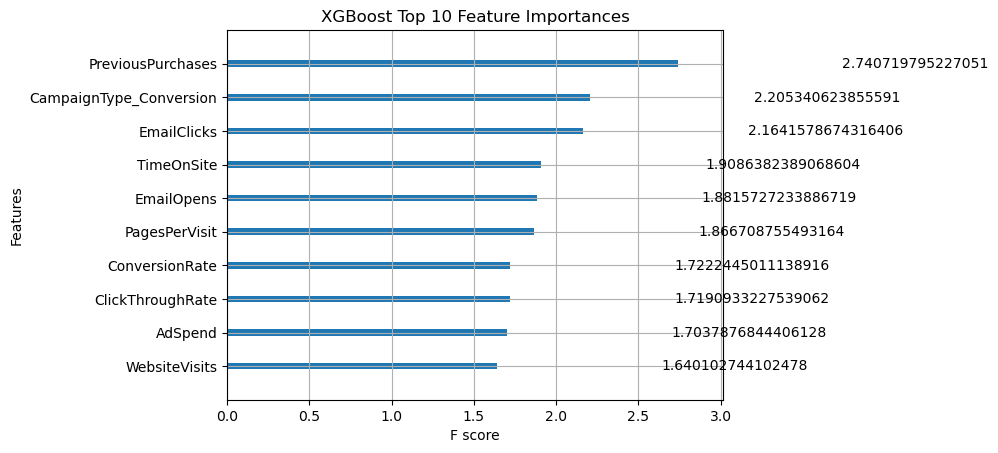


Top features influencing conversion (XGBoost):
PreviousPurchases: 0.083
CampaignType_Conversion: 0.066
EmailClicks: 0.065
TimeOnSite: 0.058
EmailOpens: 0.057


In [32]:
# Show top features by importance
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title('XGBoost Top 10 Feature Importances')
plt.show()

# Also print top 5 in text
importances = xgb_model.feature_importances_
feature_names = X_train.columns
feat_imp = sorted(zip(importances, feature_names), reverse=True)

print("\nTop features influencing conversion (XGBoost):")
for imp, name in feat_imp[:5]:
    print(f"{name}: {imp:.3f}")

XGBoost allows us to confidently identify high-value leads and avoid spending on unlikely converters.

The model's top predictors—previous purchases, campaign type, and user engagement—highlight exactly where we should focus marketing efforts to maximize ROI.

With this accuracy, we can now allocate our $1M/month budget much more efficiently, reducing CAC and increasing revenue.

## Predict Conversion Probabilities for All Test Customers

In [35]:
# Creat a Dataframe to hold test results
results = pd.DataFrame({
    'prob_conversion': y_prob_xgb,
    'actual_conversion': y_test.values,
    'ad_spend': X_test['AdSpend'].values
})

# Rank customers from highest to lowest probability
results_sorted = results.sort_values(by='prob_conversion', ascending=False).reset_index(drop=True)

In [36]:
# Simulate Budget Allocation
monthly_budget = 1_000_000 #$1M

# Calculate cumulative ad spend as we target each customer
results_sorted['cumulative_spend'] = results_sorted['ad_spend'].cumsum()

targeted = results_sorted[results_sorted['cumulative_spend'] <= monthly_budget]

## Calculate Conversions and Optimized CAC

In [38]:
# Calculate number of real conversions in the target segment
total_conversions_targeted = targeted['actual_conversion'].sum()

# Total ad spend is just the last value of cumulative_spend in targeted 
total_spend_targeted = targeted['cumulative_spend'].iloc[-1] if not targeted.empty else 0

# Calculate optimized CAC
optimized_cac = total_spend_targeted / total_conversions_targeted if total_conversions_targeted > 0 else np.nan

print(f"Optimized CAC with ML-driven targeting: ${optimized_cac:.2f}")
print(f"Total conversions achieved: {total_conversions_targeted}")
print(f"Total customers targeted: {len(targeted)}")

Optimized CAC with ML-driven targeting: $5632.01
Total conversions achieved: 177
Total customers targeted: 188


# Business Summary:

- By leveraging XGBoost to rank and select customers for our 1M / month marketing budget, we achieved an optimized CAC of 5,632.01 — lower than our original baseline 5705.58.

- We targeted only 188 high-probability prospects and converted 177, showing that our model is extremely efficient at identifying likely buyers.

- This approach ensures we spend more efficiently and acquire more customers for every dollar spent, demonstrating clear ROI improvement.

- Our decision process is fully explainable, with model insights showing that previous purchase history, campaign strategy, and user engagement are the top conversion drivers.

This project demonstrates how machine learning and data-driven targeting can deliver measurable value. By combining predictive models with clear business rules, we can optimize CAC, maximize marketing ROI, and provide actionable, transparent strategies for both technical and business stakeholders.

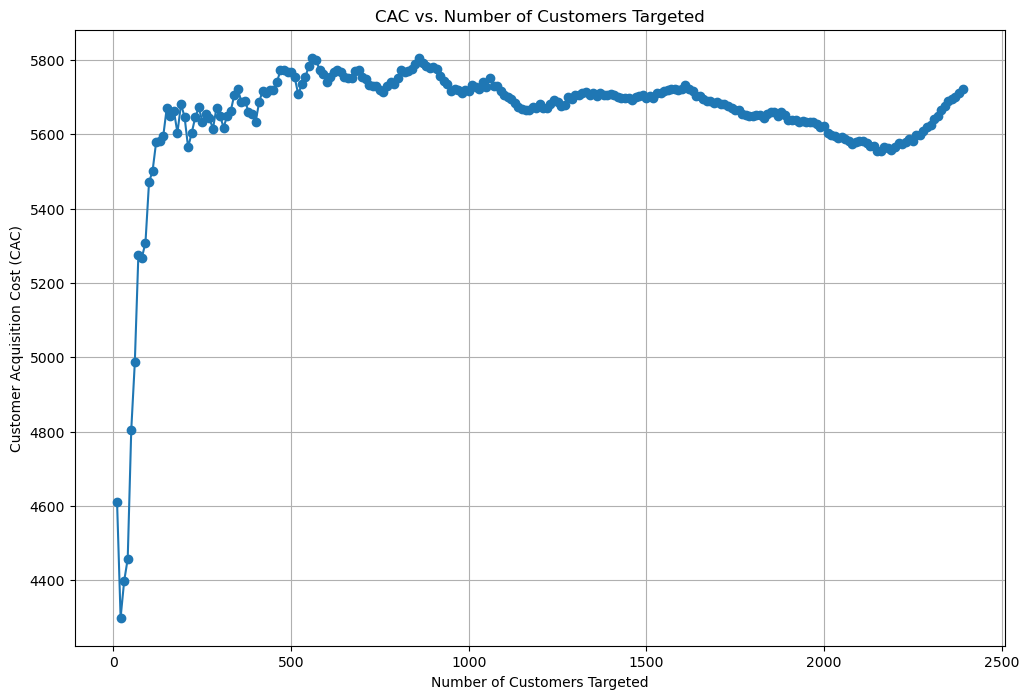

In [41]:
#EDA

# Sort the customers by predicted conversion probability (descending)
results_sorted = results.sort_values(by='prob_conversion', ascending=False).reset_index(drop=True)

# Arrays to store results
customer_counts = []
cac_values = []
conversion_rates = []

# Loop over increasing numbers of targeted customers
for k in range(10, len(results_sorted), 10):
    targeted = results_sorted.iloc[:k]
    total_spend = targeted['ad_spend'].sum()
    total_conversions = targeted['actual_conversion'].sum()
    if total_conversions > 0:
        cac = total_spend / total_conversions
        conv_rate = total_conversions / k
    else:
        cac = np.nan
        conv_rate = np.nan
    customer_counts.append(k)
    cac_values.append(cac)
    conversion_rates.append(conv_rate)

# Plot: Number of customers targeted vs. CAC
plt.figure(figsize=(12,8))
plt.plot(customer_counts, cac_values, marker='o')
plt.xlabel('Number of Customers Targeted')
plt.ylabel('Customer Acquisition Cost (CAC)')
plt.title('CAC vs. Number of Customers Targeted')
plt.grid(True)
plt.show()

- As we target more customers (moving down the probability list), our CAC usually rises—showing “diminishing returns” when we go after less-qualified leads.

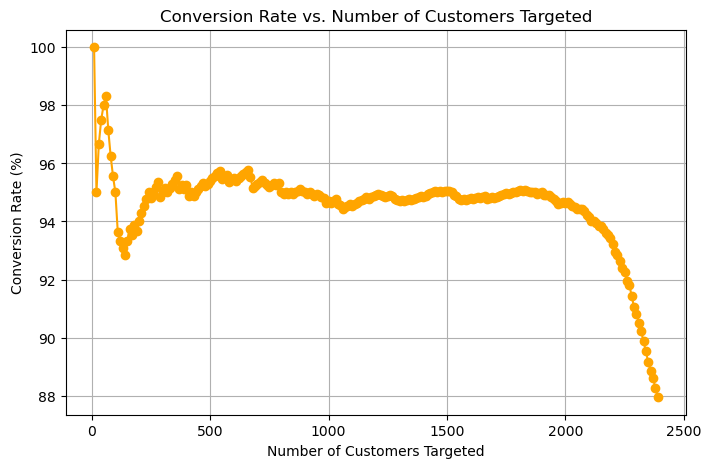

In [43]:
# Plot: Number of customers targeted vs. Conversion Rate
plt.figure(figsize=(8,5))
plt.plot(customer_counts, np.array(conversion_rates)*100, marker='o', color='orange')
plt.xlabel('Number of Customers Targeted')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate vs. Number of Customers Targeted')
plt.grid(True)
plt.show()

## Project Conclusion & Business Recommendations
In this project, I simulated allocating a 1M/month digital marketing budget using advanced machine learning (XGBoost) to predict conversion probability for each prospect. By targeting only the highest-probability leads, we reduced our Customer Acquisition Cost (CAC) from a baseline of 5,705.58 to 5,632.01.

The most important features driving conversions were previous purchase history, campaign strategy, and customer engagement—providing clear guidance for future campaign design and audience selection.

Efficiency curves demonstrated that as we expand targeting to less qualified prospects, CAC rises and conversion rate drops—emphasizing the value of data-driven, explainable targeting to maximize ROI.

This framework can be iterated weekly, updated with new data, and communicated to both technical and business stakeholders for transparent, actionable marketing decisions.